In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

PATH_SUBJ_EVAL = "../0_data/9_evaluation/Masterarbeit MusikAI Umfrage.csv"

In [100]:
survey_order = {
    "orig vs. a1": [
        {"question": 2, "orig": "Song A", "a1": "Song B"},
        {"question": 10, "orig": "Song B", "a1": "Song A"},
        {"question": 4, "orig": "Song A", "a1": "Song B"}
    ],
    "orig vs. d": [
        {"question": 5, "orig": "Song A", "d": "Song B"},
        {"question": 9, "orig": "Song A", "d": "Song B"},
        {"question": 8, "orig": "Song B", "d": "Song A"}
    ],
    "a1 vs. d": [
        {"question": 3, "a1": "Song A", "d": "Song B"},
        {"question": 6, "a1": "Song B", "d": "Song A"},
        {"question": 1, "a1": "Song B", "d": "Song A"}
    ]
}

In [101]:
df_all = pd.read_csv(PATH_SUBJ_EVAL)
df_all.head()

,Zeitstempel,Video 1: Welcher Song gefällt Ihnen besser?,Video 2: Welcher Song gefällt Ihnen besser?,Video 3: Welcher Song gefällt Ihnen besser?,Video 4: Welcher Song gefällt Ihnen besser?,Video 5: Welcher Song gefällt Ihnen besser?,Video 6: Welcher Song gefällt Ihnen besser?,Video 7: Welcher Song gefällt Ihnen besser?,Video 8: Welcher Song gefällt Ihnen besser?,Video 9: Welcher Song gefällt Ihnen besser?,Video 10: Welcher Song gefällt Ihnen besser?,"War es schwierig für Sie, sich für einen Song zu entscheiden oder war die Wahl immer klar?",Ist Ihnen Musik wichtig?,Haben Sie eine musikalische Affinität?,Spielen Sie ein Instrument?,Welchem Geschlecht fühlen Sie sich zugehörig?,Wie alt sind Sie?
0,2023/05/03 11:40:32 PM OESZ,Song B,Song A,Song A,Song B,Song B,Song A,Song B,Song A,Song B,Song B,3,NaN,NaN,NaN,männlich,18-25
1,2023/05/09 11:57:50 AM OESZ,Song A,Song A,Song B,Song B,Song B,Song B,Song B,Song B,Song A,Song B,2,sehr wichtig,ja,"ja, hobbymäßig",männlich,25-35
2,2023/05/09 12:31:35 PM OESZ,Song B,Song A,Song B,Song A,Song B,Song B,Song A,Song B,Song A,Song A,4,normal,nein,nein,weiblich,18-25
3,2023/05/09 12:32:27 PM OESZ,Song B,Song A,Song A,Song B,Song A,Song A,Song B,Song B,Song B,Song B,4,sehr wichtig,ja,nein,männlich,18-25
4,2023/05/09 12:37:31 PM OESZ,Song B,Song A,Song B,Song B,Song B,Song B,Song B,Song B,Song B,Song B,4,normal,ja,"ja, hobbymäßig",weiblich,18-25


In [108]:
df_cleaned = df_all[df_all["Video 7: Welcher Song gefällt Ihnen besser?"] == "Song B"]
#df_cleaned = df_all
df_cleaned.drop(columns=["Video 7: Welcher Song gefällt Ihnen besser?"], inplace=True)

for comparison in survey_order:
        comp1 = (comparison.split(" vs. "))[0]
        comp2 = (comparison.split(" vs. "))[1]
        for i,q in enumerate(survey_order[comparison]):
            df_cleaned.rename({f"Video {q['question']}: Welcher Song gefällt Ihnen besser?": f"{comparison}_v{i+1}"}, axis=1, inplace=True)
            df_cleaned[f"{comparison}_v{i+1}"].replace({q[comp1]: comp1, q[comp2]: comp2}, inplace=True)

df_cleaned.rename(columns={
    "War es schwierig für Sie, sich für einen Song zu entscheiden oder war die Wahl immer klar?" : "decision",
    "Ist Ihnen Musik wichtig?": "music_importance",
    "Haben Sie eine musikalische Affinität?": "musical_affinity",
    "Spielen Sie ein Instrument?": "instrument",
    "Welchem Geschlecht fühlen Sie sich zugehörig?": "gender",
    "Wie alt sind Sie?": "age"
    }, inplace=True)

df_cleaned["music_importance"].replace({"sehr wichtig": "very important"}, inplace=True)
df_cleaned["musical_affinity"].replace({"ja": "yes", "nein": "no"}, inplace=True)
df_cleaned["instrument"].replace({"ja, hobbymäßig": "yes (hobby)", "ja, professionell": "yes (professional)", "nein": "no"}, inplace=True)
df_cleaned["gender"].replace({"männlich": "male", "weiblich": "female"}, inplace=True)

df_cleaned.head()

,Zeitstempel,a1 vs. d_v3,orig vs. a1_v1,a1 vs. d_v1,orig vs. a1_v3,orig vs. d_v1,a1 vs. d_v2,orig vs. d_v3,orig vs. d_v2,orig vs. a1_v2,decision,music_importance,musical_affinity,instrument,gender,age
0,2023/05/03 11:40:32 PM OESZ,a1,orig,a1,a1,d,d,d,d,orig,3,NaN,NaN,NaN,male,18-25
1,2023/05/09 11:57:50 AM OESZ,d,orig,d,a1,d,a1,orig,orig,orig,2,very important,yes,yes (hobby),male,25-35
3,2023/05/09 12:32:27 PM OESZ,a1,orig,a1,a1,orig,d,orig,d,orig,4,very important,yes,no,male,18-25
4,2023/05/09 12:37:31 PM OESZ,a1,orig,d,a1,d,a1,orig,d,orig,4,normal,yes,yes (hobby),female,18-25
5,2023/05/09 12:40:17 PM OESZ,a1,orig,a1,a1,d,d,orig,d,a1,3,very important,no,no,male,25-35


Text(0.5, 1.0, 'a1 vs. d')

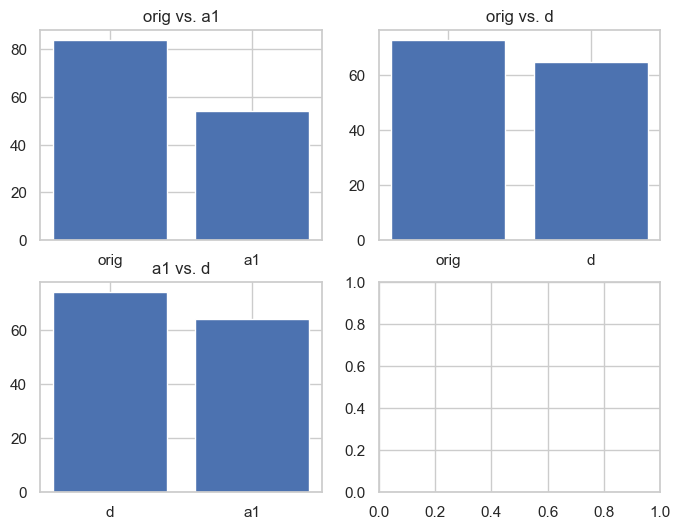

In [167]:
melted_dfs = [None, None, None ]
names = ["orig vs. a1", "orig vs. d", "a1 vs. d"]

for i, name in enumerate(names):
    questions = [ f"{name}_v1", f"{name}_v2", f"{name}_v3"]

    melted_dfs[i] = pd.melt(df_cleaned, value_vars=questions, var_name='questions', value_name='answers')

#sns.countplot(data=melted_df, x='answers')
#plt.xlabel(name)
#plt.ylabel('Count')
#plt.title(name)
##plt.legend(title=hue_col)
#plt.show()

figure, axis = plt.subplots(2, 2)
figure.set_size_inches(8, 6)
  
axis[0, 0].bar(melted_dfs[0]["answers"].value_counts().index, melted_dfs[0]["answers"].value_counts())
axis[0, 0].set_title(names[0])

axis[0, 1].bar(melted_dfs[1]["answers"].value_counts().index, melted_dfs[1]["answers"].value_counts())
axis[0, 1].set_title(names[1])

axis[1, 0].bar(melted_dfs[2]["answers"].value_counts().index, melted_dfs[2]["answers"].value_counts())
axis[1, 0].set_title(names[2])

In [168]:
def countplot(df, questions, hue_col, name, color_palette="rainbow"):
    melted_df = pd.melt(df, id_vars=hue_col, value_vars=questions, var_name='questions', value_name='answers')

    sns.countplot(data=melted_df, x='answers', hue=hue_col, palette=color_palette)
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.title(name)
    plt.legend(title=hue_col)
    plt.show()

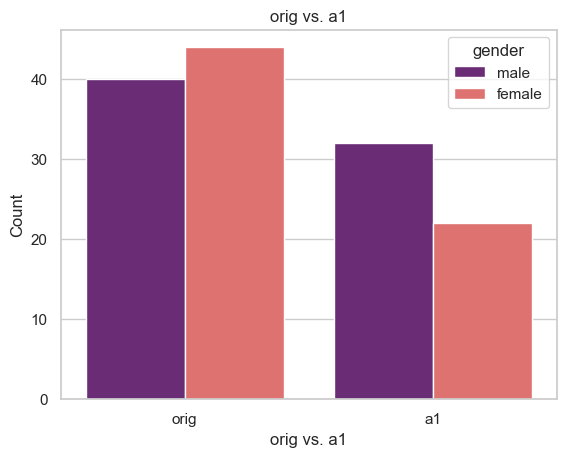

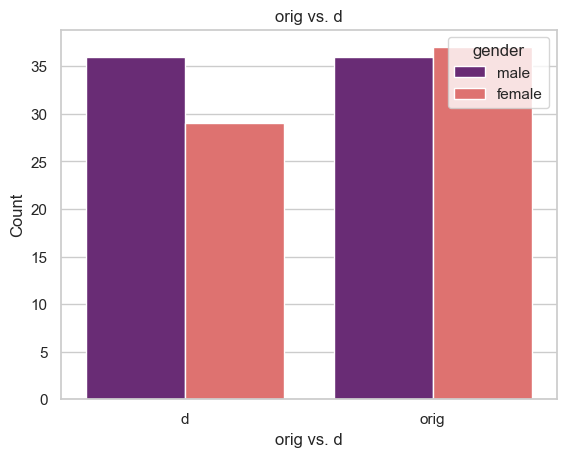

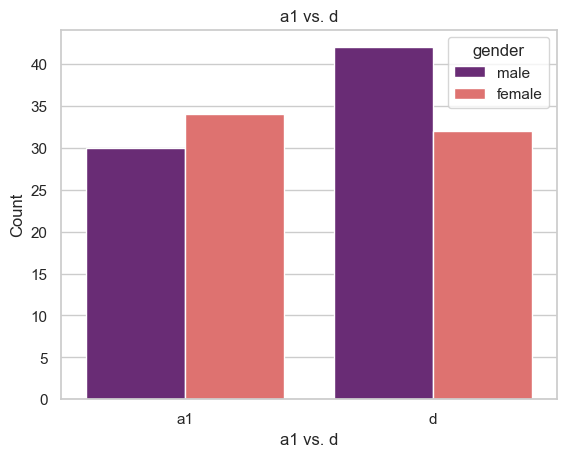

In [169]:
for name in ["orig vs. a1", "orig vs. d", "a1 vs. d"]:
    hue_col = "gender"
    questions = [ f"{name}_v1", f"{name}_v2", f"{name}_v3"]
    countplot(df_cleaned, questions, hue_col, name, color_palette="magma")

## Old Versions

In [5]:
def get_results(df, survey_order):
    survey_results = {}

    for comparison in survey_order:

        comp1 = (comparison.split(" vs. "))[0]
        comp2 = (comparison.split(" vs. "))[1]
        survey_results[comparison] = {}

        for i,q in enumerate(survey_order[comparison]):
            survey_results[comparison].update({
                f"{comp1}_v{i+1}": df[f"Video {q['question']}: Welcher Song gefällt Ihnen besser?"].value_counts()[q[comp1]],
                f"{comp2}_v{i+1}": df[f"Video {q['question']}: Welcher Song gefällt Ihnen besser?"].value_counts()[q[comp2]],
            })
        
        survey_results[comparison].update({
            f"{comp1}_all": survey_results[comparison][f"{comp1}_v1"] + survey_results[comparison][f"{comp1}_v2"] + survey_results[comparison][f"{comp1}_v3"],
            f"{comp2}_all": survey_results[comparison][f"{comp2}_v1"] + survey_results[comparison][f"{comp2}_v2"] + survey_results[comparison][f"{comp2}_v3"]
        })

    return survey_results

In [6]:
results_all = get_results(df_all, survey_order)
results_cleaned = get_results(df_cleaned, survey_order)

In [7]:
results_all


{'orig vs. a1': {'orig_v1': 40,
  'a1_v1': 16,
  'orig_v2': 35,
  'a1_v2': 21,
  'orig_v3': 24,
  'a1_v3': 32,
  'orig_all': 99,
  'a1_all': 69},
 'orig vs. d': {'orig_v1': 10,
  'd_v1': 46,
  'orig_v2': 36,
  'd_v2': 20,
  'orig_v3': 41,
  'd_v3': 15,
  'orig_all': 87,
  'd_all': 81},
 'a1 vs. d': {'a1_v1': 28,
  'd_v1': 28,
  'a1_v2': 24,
  'd_v2': 32,
  'a1_v3': 29,
  'd_v3': 27,
  'a1_all': 81,
  'd_all': 87}}